# Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importación del dataset

In [3]:
churn_data_set = pd.read_csv("..\Data\Churn Prediction.csv",delimiter = ";",index_col=0)
churn_data_set.head()

,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
Row,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Análisis dataset

In [4]:
churn_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           10000 non-null  int64  
 1   Surname      10000 non-null  object 
 2   Score        10000 non-null  int64  
 3   Nationality  10000 non-null  object 
 4   Gender       10000 non-null  object 
 5   Age          10000 non-null  int64  
 6   Tenure       10000 non-null  int64  
 7   Balance      10000 non-null  float64
 8   Products     10000 non-null  int64  
 9   Card         10000 non-null  int64  
 10  Active       10000 non-null  int64  
 11  Salary       10000 non-null  float64
 12  Exited       10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
churn_data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
Score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
Products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
Card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
Active,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
Salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


# Análisis bivariado

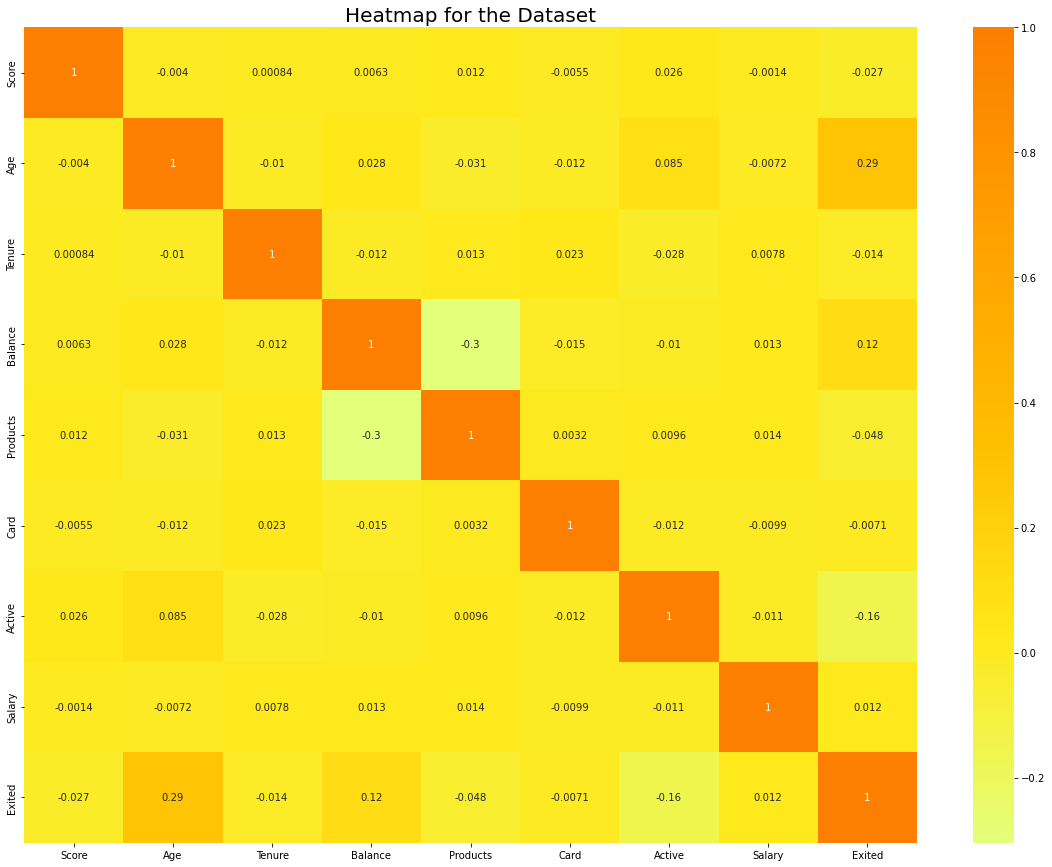

In [6]:
churn_data_set.drop('Id',axis=1, inplace=True)

plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(churn_data_set.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

La correlación entre las varibles 

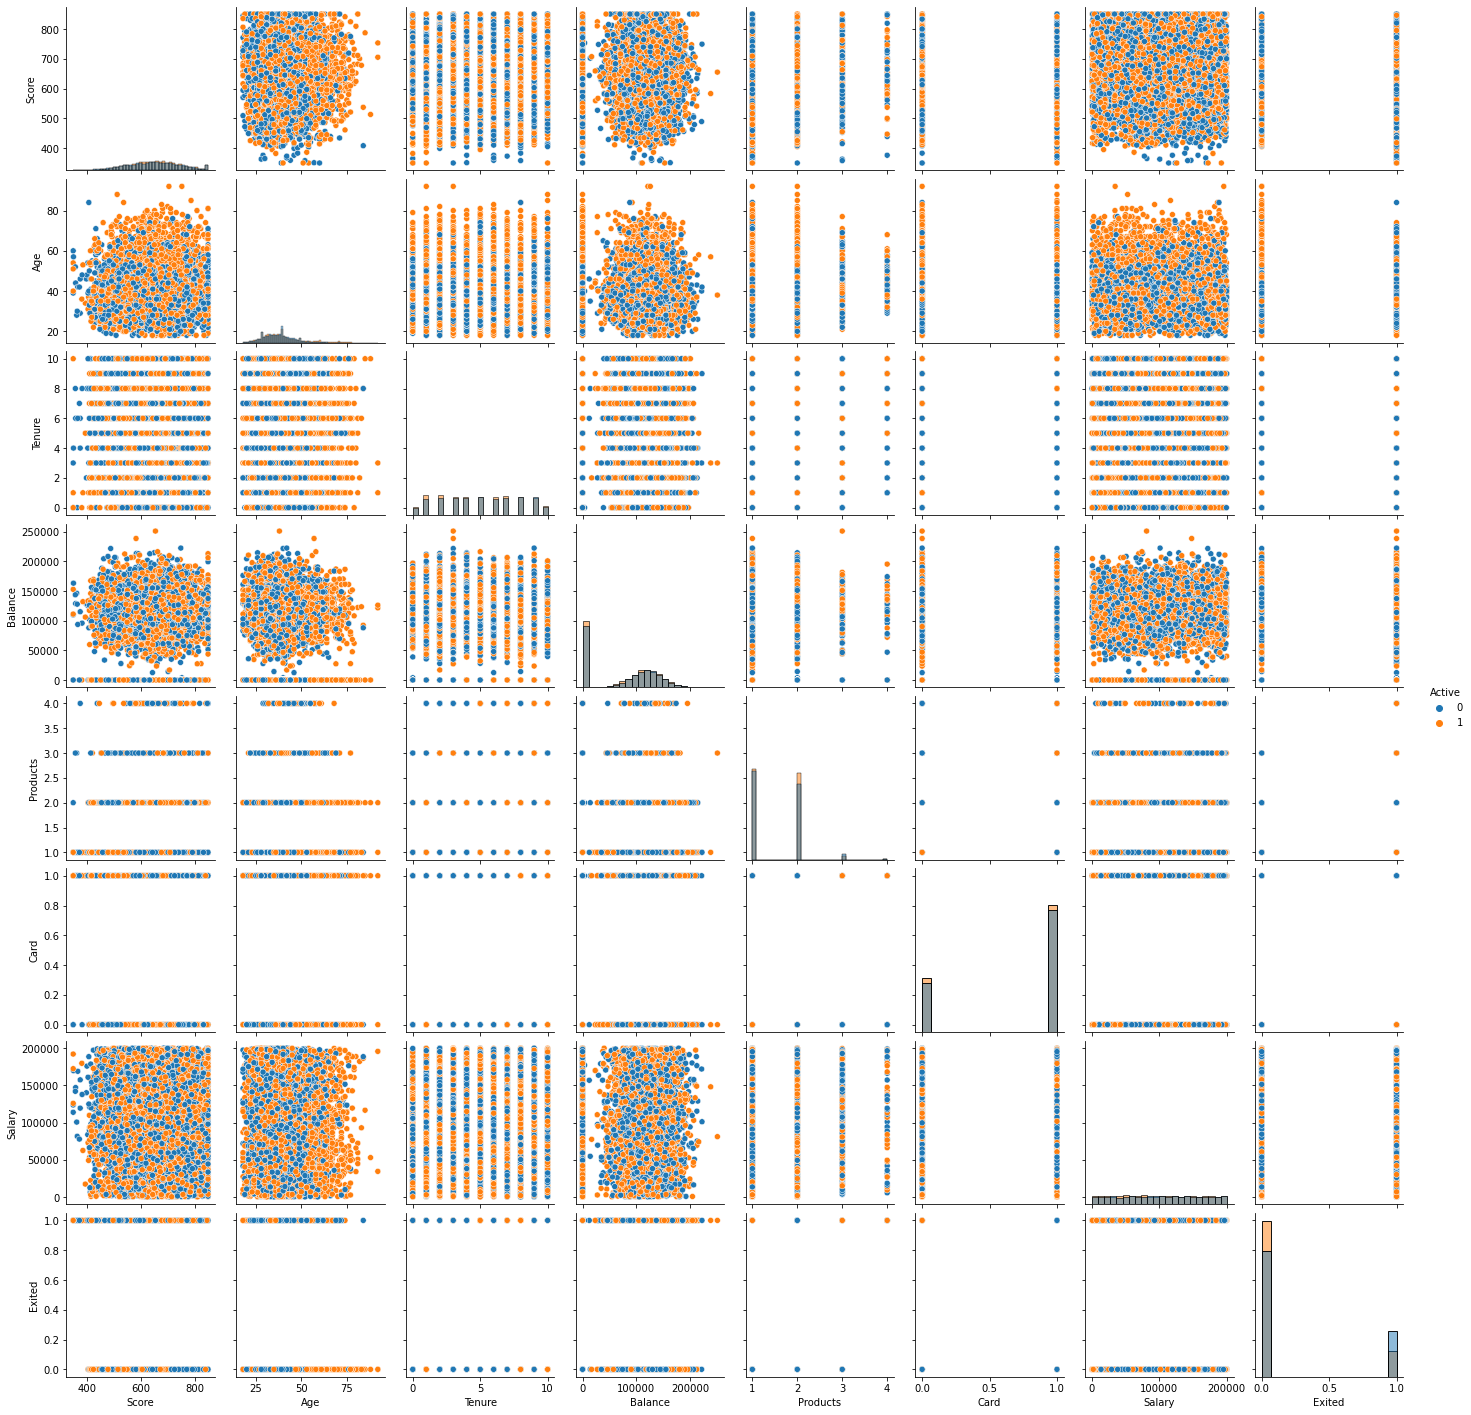

In [15]:
sns.pairplot(churn_data_set,diag_kind="hist",hue='Active');

### Observaciones

Gráficamente no se ve una relación entre ninguna de las variables numéricas.  

Como se observó en el análisis univariado la variable balance tiene muchos valores en 0. Esto hace pensar que los usuarios con 0 son usuarios a los cuales no se les conoce el balance de cuenta, lo cual es algo a tener en cuenta a la hora de hacer un modelo.

<AxesSubplot:xlabel='Balance', ylabel='Salary'>

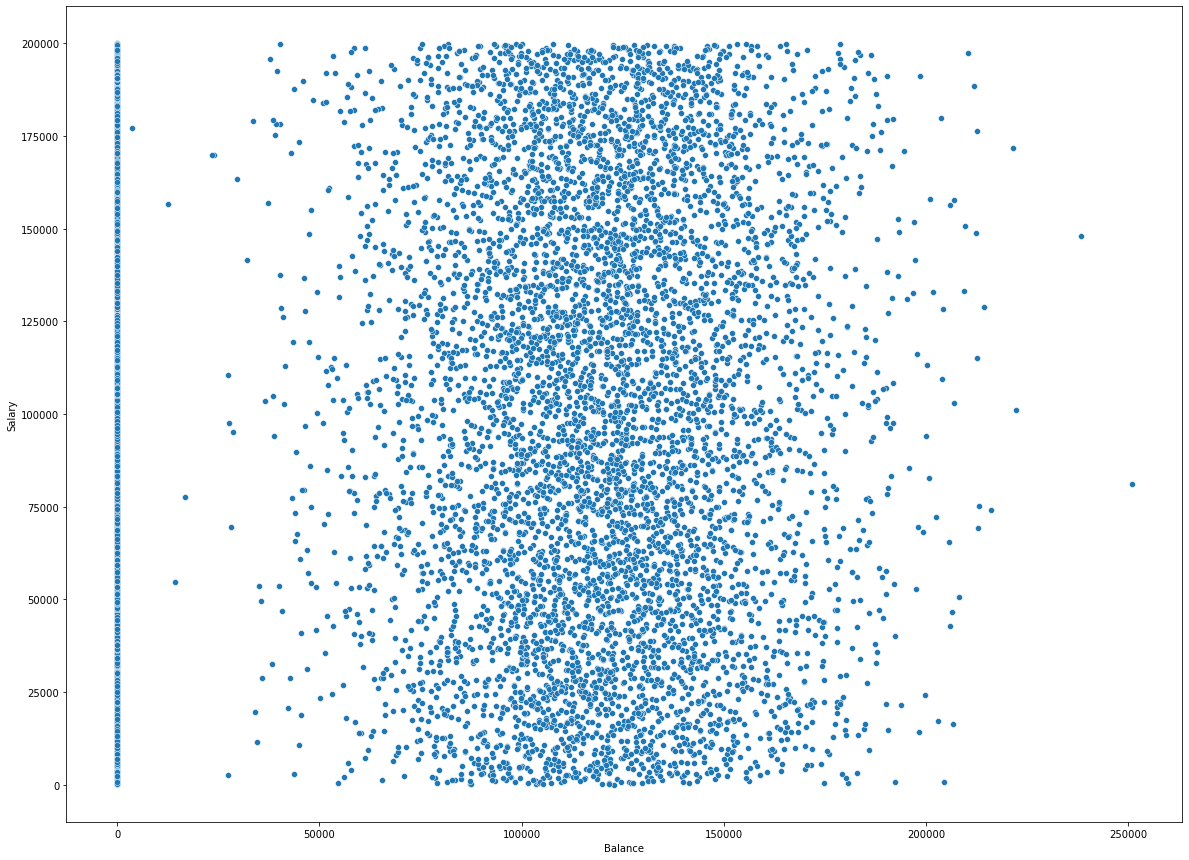

In [12]:
sns.scatterplot(y=churn_data_set['Salary'],x= churn_data_set['Balance'])

Se esperaría que balance y salario tuviesen alguna correlación a nivel gráfico, pero no es el caso.

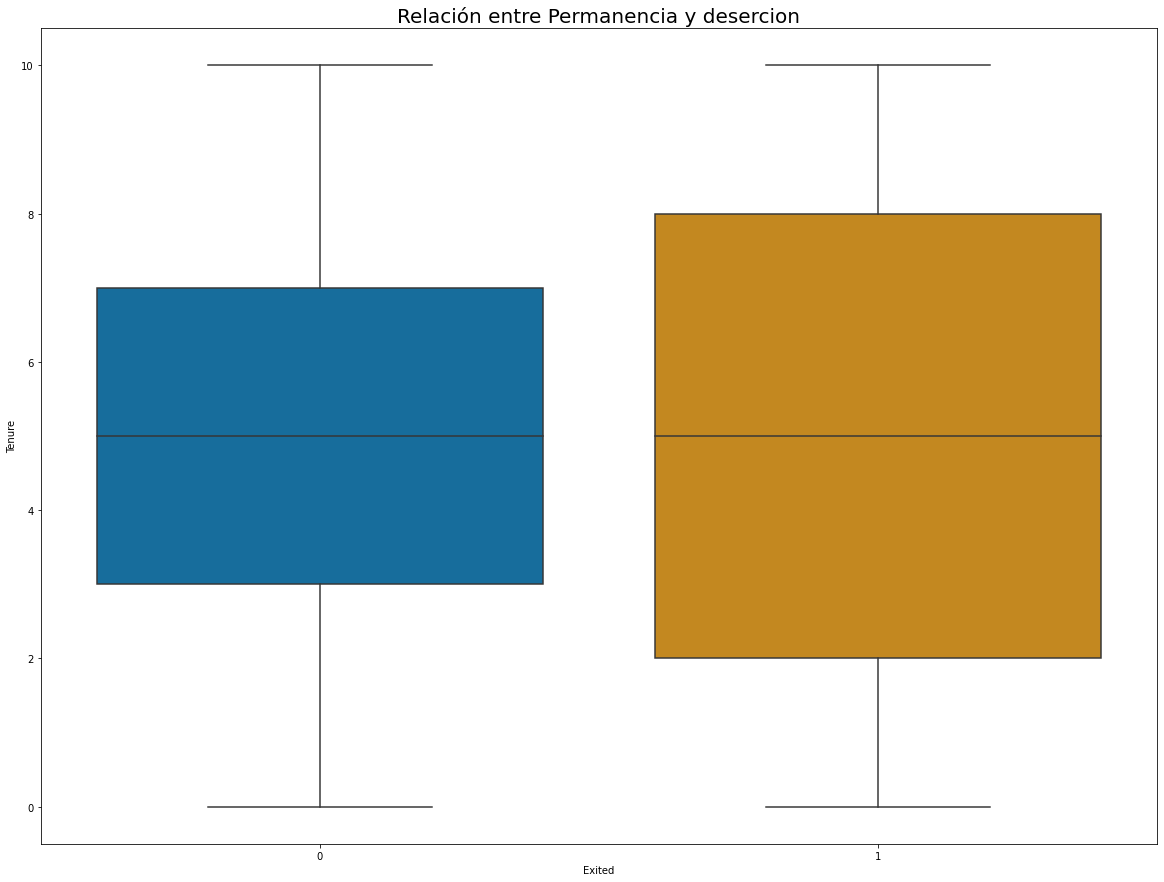

In [11]:
# Permanencia vs desercion
sns.boxplot(x=churn_data_set['Exited'], y=churn_data_set['Tenure'], palette = 'colorblind')
plt.title('Relación entre Permanencia y desercion', fontsize = 20, fontweight = 30)
plt.show()

No parece haber una relación entre la permanencia y la deserción de los usuarios

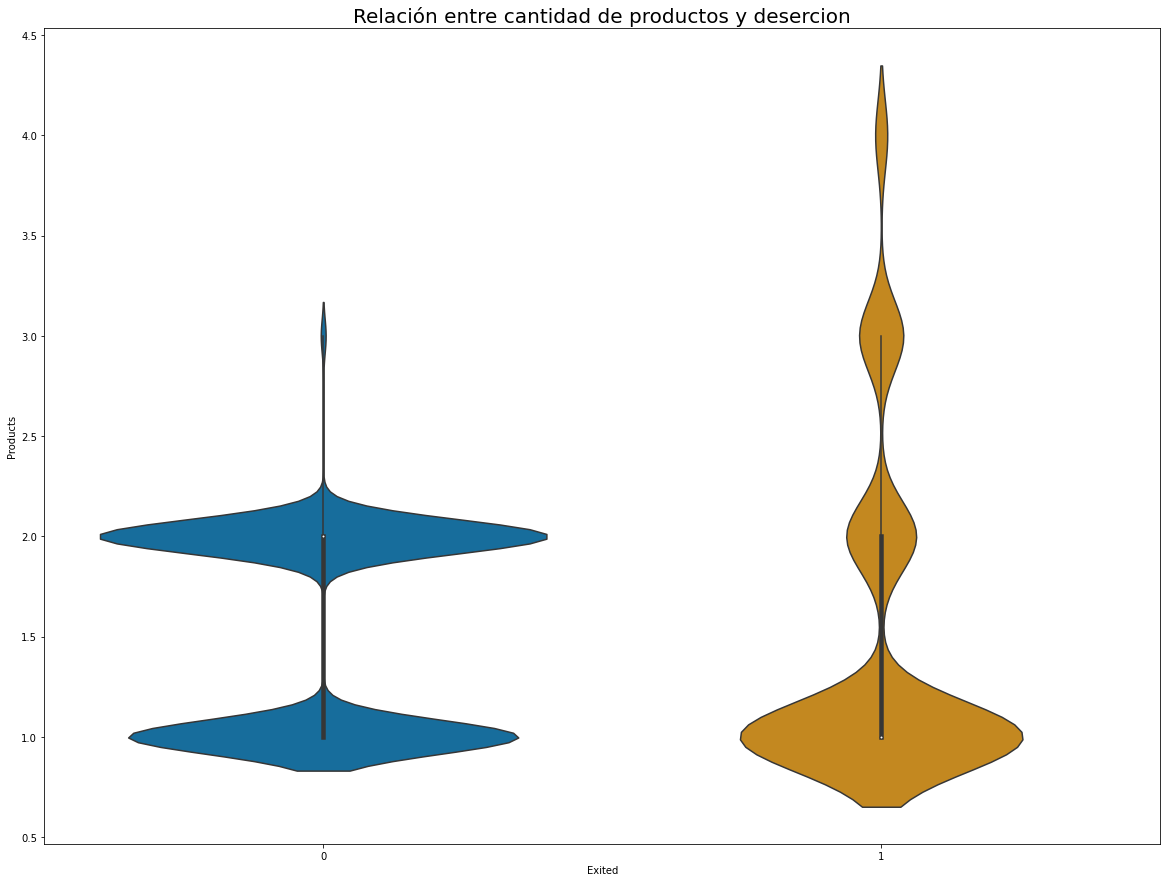

In [10]:
# cantidad de productos vs desercion
sns.violinplot(x=churn_data_set['Exited'], y=churn_data_set['Products'], palette = 'colorblind')
plt.title('Relación entre cantidad de productos y desercion', fontsize = 20, fontweight = 30)
plt.show()

Son más usuarios los que compran 1 o 2 productos y no desertan. Hay mas usuarios que desertan al comprar más de de 2 productos

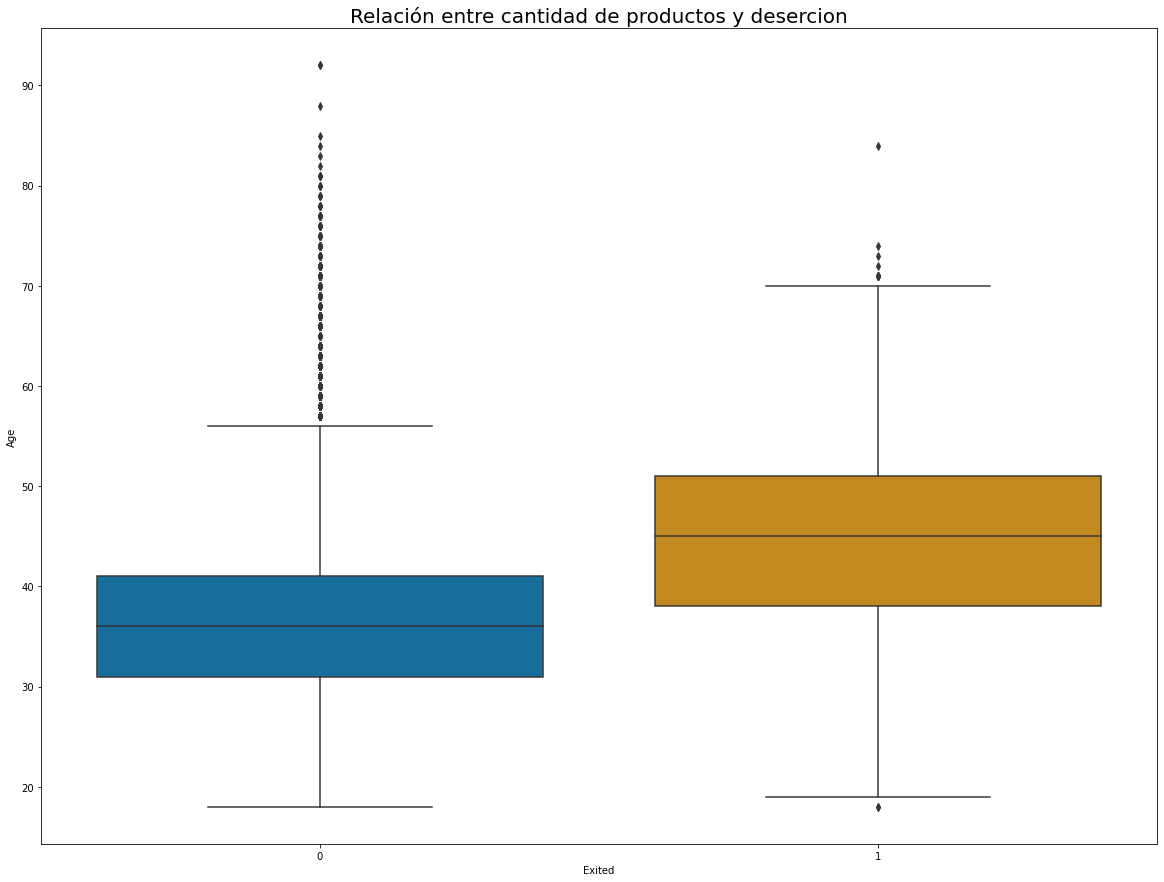

In [8]:
# cantidad de productos vs desercion
sns.boxplot(x=churn_data_set['Exited'], y=churn_data_set['Age'], palette = 'colorblind')
plt.title('Relación entre cantidad de productos y desercion', fontsize = 20, fontweight = 30)
plt.show()

Las personas mayores son mas propensas a desertar.

In [98]:
#Análisis de los generos
exit_by_gender = churn_data_set.groupby(['Gender', 'Exited']).size().reset_index(name="cantidad")
exit_by_gender['%'] = 100 * exit_by_gender['cantidad'] / exit_by_gender.groupby('Gender')['cantidad'].transform('sum')
print(exit_by_gender)

   Gender  Exited  cantidad          %
0  Female       0      3404  74.928461
1  Female       1      1139  25.071539
2    Male       0      4559  83.544072
3    Male       1       898  16.455928


In [104]:
print("El porcentaje de mujeres que desertan es de: %.2f"% exit_by_gender['%'][1] , "%", "y el de hombre es de: %.2f" %exit_by_gender['%'][3], "%" )

El porcentaje de mujeres que desertan es de: 25.07 % y el de hombre es de: 16.46 %


Las mujeres desertan un 10% más que los hombres

<AxesSubplot:xlabel='Exited', ylabel='%'>

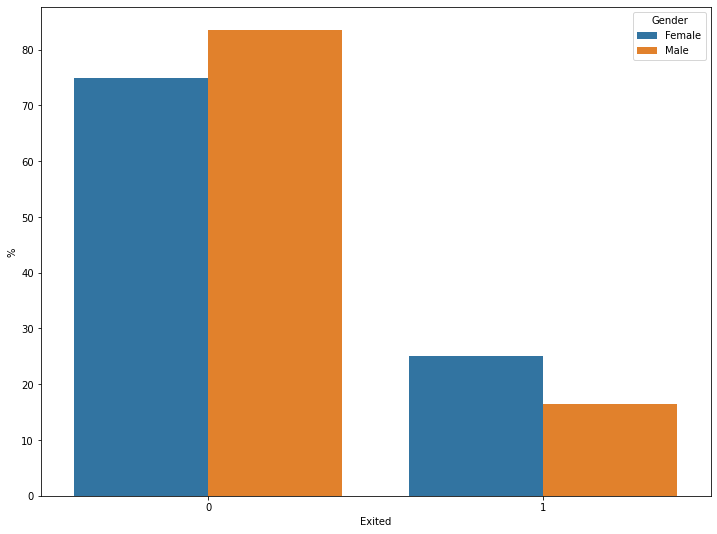

In [105]:
sns.barplot(data=exit_by_gender, x = 'Exited', y='%', hue = 'Gender')

In [107]:
#Análisis de los pais
exit_by_country = churn_data_set.groupby(['Nationality', 'Exited']).size().reset_index(name="cantidad")
exit_by_country['%'] = 100 * exit_by_country['cantidad'] / exit_by_country.groupby('Nationality')['cantidad'].transform('sum')
print(exit_by_country)

  Nationality  Exited  cantidad          %
0      France       0      4204  83.845233
1      France       1       810  16.154767
2     Germany       0      1695  67.556796
3     Germany       1       814  32.443204
4       Spain       0      2064  83.326605
5       Spain       1       413  16.673395


<AxesSubplot:xlabel='Exited', ylabel='%'>

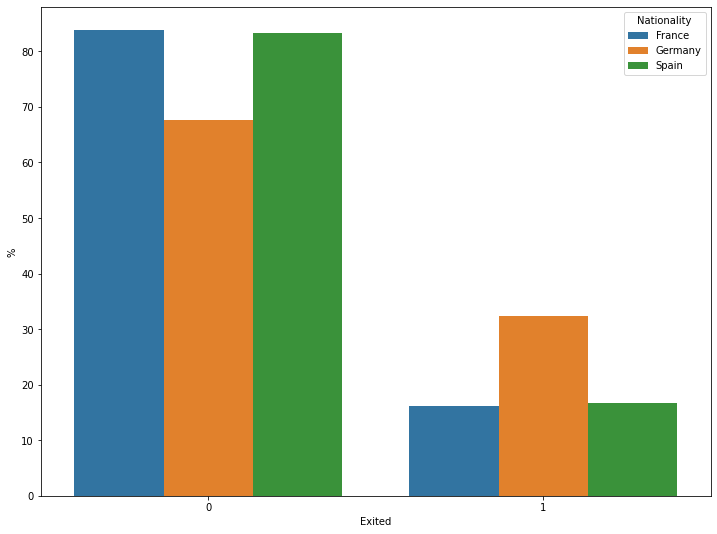

In [108]:
sns.barplot(data=exit_by_country, x = 'Exited', y='%', hue = 'Nationality')

Los usuarios alemanes son los que mas desertan en una proporcion cercana al doble que en otros paises